In [55]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt

df_results_temp_2 = pd.read_csv("results/codice/Information-Retrieval_evaluation_paraphrase-multilingual-MiniLM-L12-v2_temperature_2_results.csv")
df_results_temp_2 = df_results_temp_2.drop(columns=["epoch", "steps"])

df_results_temp_1 = pd.read_csv("results/codice/Information-Retrieval_evaluation_paraphrase-multilingual-MiniLM-L12-v2_temperature_1_results.csv")
df_results_temp_1 = df_results_temp_1.drop(columns=["epoch", "steps"])

df_results_temp_01 = pd.read_csv("results/codice/Information-Retrieval_evaluation_paraphrase-multilingual-MiniLM-L12-v2_temperature_01_results.csv")
df_results_temp_01 = df_results_temp_01.drop(columns=["epoch", "steps"])

df_results_finetune_temp_1 = pd.read_csv("results/codice/Information-Retrieval_evaluation_finetuned-paraphrase-multilingual-MiniLM-L12-v2_temperature_1_results.csv")
df_results_finetune_temp_1 = df_results_finetune_temp_1.drop(columns=["epoch", "steps"])

df_results_finetune_temp_1

,cosine-Accuracy@1,cosine-Accuracy@3,cosine-Accuracy@5,cosine-Accuracy@10,cosine-Precision@1,cosine-Recall@1,cosine-Precision@3,cosine-Recall@3,cosine-Precision@5,cosine-Recall@5,cosine-Precision@10,cosine-Recall@10,cosine-MRR@10,cosine-NDCG@10,cosine-MAP@100
0,0.463727,0.594595,0.652916,0.722617,0.463727,0.463727,0.198198,0.594595,0.130583,0.652916,0.072262,0.722617,0.543198,0.586101,0.55075


In [56]:
metrics = ['cosine-Accuracy@1',
            'cosine-Precision@1',
            'cosine-Recall@1',
            'cosine-MRR@10',
            'cosine-NDCG@10']

df_results_temp_1_radar = df_results_temp_1[metrics]
df_results_temp_01_radar = df_results_temp_01[metrics]
df_results_temp_2_radar = df_results_temp_2[metrics]
df_results_finetune_temp_1_radar = df_results_finetune_temp_1[metrics]

## **Precision = relevant items retrieved / total K items retrieved**
### Ideally for all queries I should retrieve the right item (top-k=1) to have a precision of 1. 
### In our case the precision is .45 (no-finetuned-model) and .6 for finetuned-model. 
### In both cases the precision decreases as the number of retrieved items increase (top-k>1).

In [57]:
num_metrics = len(metrics)
angles = [i / float(num_metrics) * 2 * pi for i in range(num_metrics)]
angles += angles[:1]

In [58]:
def plot_radar_chart(df_results_model_1_radar, df_results_model_2_radar, metrics, label_1='Baseline Model (multilingual-MiniLM-L12-v2)', label_2='Baseline Model (multilingual-MiniLM-L12-v2)', save_path=None):

    GRAY = "#666666"

    # Compute mean values
    finetuned_means = df_results_model_1_radar.mean().values
    baseline_means = df_results_model_2_radar.mean().values

    # Compute improvement
    improvement = finetuned_means - baseline_means
    percent_improvement = 100 * improvement / (baseline_means + 1e-8)  # avoid divide-by-zero

    _, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw the outlines and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, color=GRAY, size=8, weight='bold', rotation=45)

    ax.set_yticks([0.2, 0.4, 0.5])
    ax.set_yticklabels(["20%", "40%", "50%"], color=GRAY, size=7)
    ax.set_ylim(0, .6)

    # add in red the circle at 50%
    ax.scatter(angles, [0.5] * len(angles), color='red', s=20, label='50% threshold', zorder=5)

    # Plot data
    ax.plot(angles, df_results_model_1_radar.mean().values.tolist() + [df_results_model_1_radar.mean().values[0]], linewidth=1, linestyle='solid', label=label_1, color='blue')
    ax.fill(angles, df_results_model_1_radar.mean().values.tolist() + [df_results_model_1_radar.mean().values[0]], color='blue', alpha=0.25)

    # Plot data for not finetuned model
    ax.plot(angles, df_results_model_2_radar.mean().values.tolist() + [df_results_model_2_radar.mean().values[0]], linewidth=1, linestyle='solid', label=label_2, color='red')
    ax.fill(angles, df_results_model_2_radar.mean().values.tolist() + [df_results_model_2_radar.mean().values[0]], color='red', alpha=0.25)

    # Annotate improvement
    for i, angle in enumerate(angles[:-1]):
        label = f"+{percent_improvement[i]:.1f}%" if percent_improvement[i] >= 0 else f"{percent_improvement[i]:.1f}%"
        ax.text(angle, .4, label, size=10, color='blue' if percent_improvement[i] >= 0 else 'darkred', ha='center', va='center')

    plt.title("Synthetic QA from codice degli appalti\nRetrieval performance comparison", size=14, weight='bold', color=GRAY, pad=20)
    plt.legend(loc='center', fontsize=8, frameon=False, bbox_to_anchor=(1.2, 0.1))
    plt.grid(color=GRAY, linestyle='--', linewidth=0.5)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

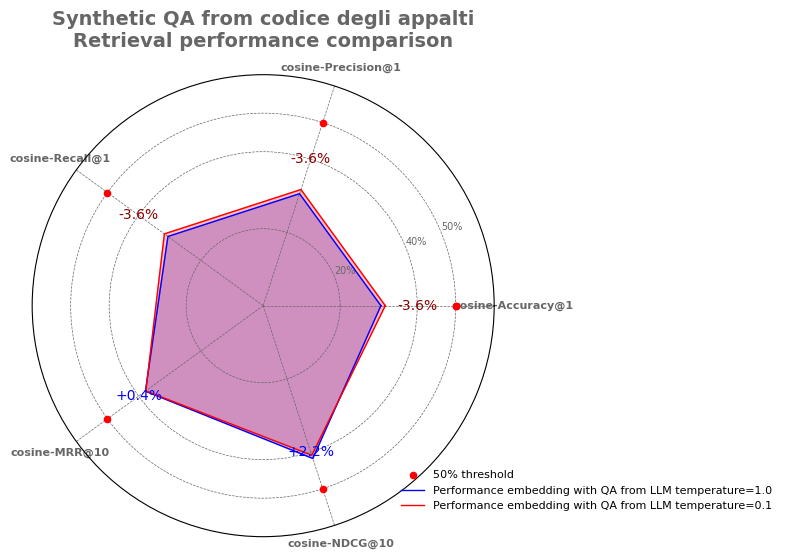

In [59]:
plot_radar_chart(df_results_temp_1_radar,
                 df_results_temp_01_radar, 
                 metrics, 
                 label_1='Performance embedding with QA from LLM temperature=1.0', 
                 label_2='Performance embedding with QA from LLM temperature=0.1',
                 save_path="imgs/radar_chart_temperature_comparison_1_0_vs_0_1.png")

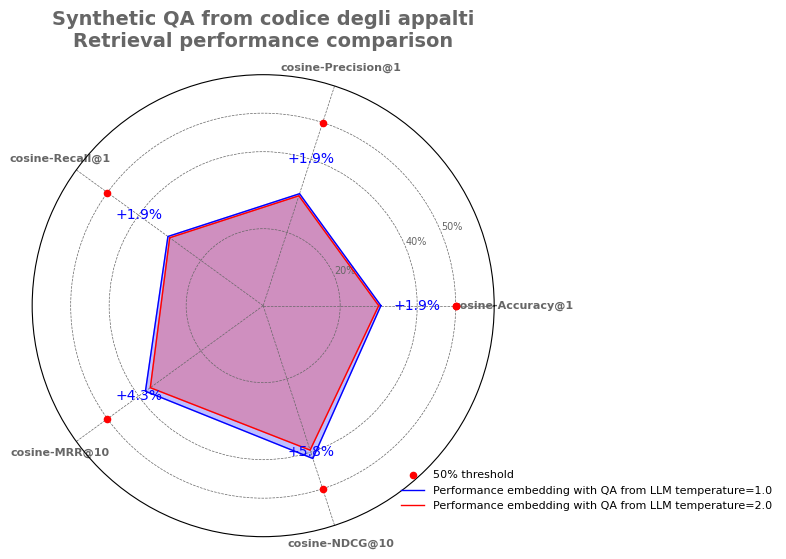

In [60]:
plot_radar_chart(df_results_temp_1_radar,
                df_results_temp_2_radar,
                metrics, 
                label_1='Performance embedding with QA from LLM temperature=1.0', 
                label_2='Performance embedding with QA from LLM temperature=2.0',
                save_path="imgs/radar_chart_temperature_comparison_1_0_vs_2_0.png")

# Temperature 1.0 Baseline and Finetuned

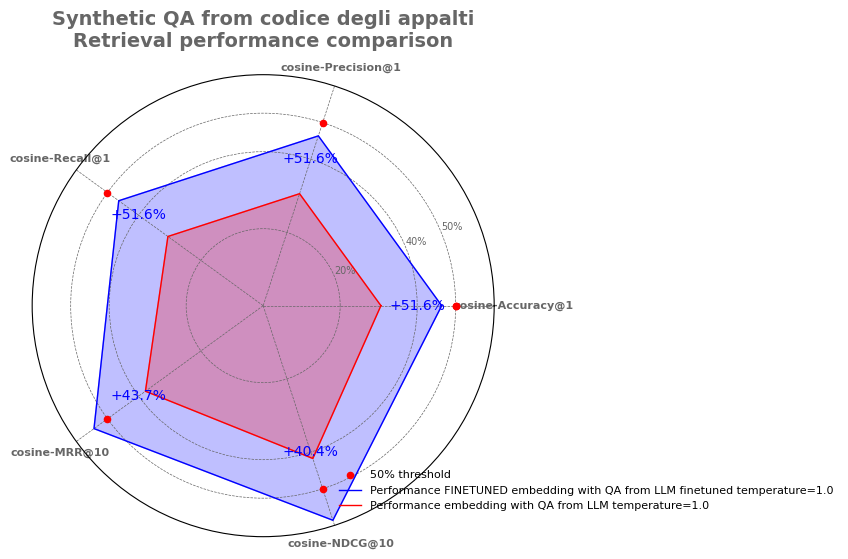

In [61]:
plot_radar_chart(df_results_finetune_temp_1_radar, 
                 df_results_temp_1_radar,
                 metrics, 
                 label_1='Performance FINETUNED embedding with QA from LLM finetuned temperature=1.0', 
                 label_2='Performance embedding with QA from LLM temperature=1.0',
                save_path="imgs/radar_chart_finetuned_vs_temperature_1_0.png")